# INSTACART: pre-procesamiento y análisis exploratorio de datos.

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen a domicilio.
El objetivo de este proyecto es limpiar los datos y preparar un informe que brinde información sobre los hábitos de compra de los clientes de Instacart, es decir, realizar el preprocesamiento y el análisis exploratorio de los datos.
A lo largo del trabajo, se realizarán gráficos que comuniquen los resultados por medio de la librería matplotlib.pyplot. 


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos


### Procedimiento de Solución para el paso 1

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
R:
- Leer los dataframes de manera general con pd.read_csv().
- Luego, mostrar cada df por separado (mediante el método head()) para verificar si estan correctamente leidos, si no, verificar cuales son los errores de lectura que se presentan y analizar con que parámetros de la función read_csv() se puede corregir la lectura.
- Finalmente, implementar los cambios y ejecutar nuevamente la función read_csv() y mostrar otra vez los DF para verificar la lectura correcta de los datos
    - También se usará el método info() para verificar datos nulos y que los tipos de datos sean congruentes con la información que representan.

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('../datasets/instacart_orders.csv', sep = ';')
products = pd.read_csv('../datasets/products.csv',sep = ';')
aisles = pd.read_csv('../datasets/aisles.csv',sep = ';')
departments = pd.read_csv('../datasets/departments.csv',sep = ';')
order_products = pd.read_csv('../datasets/order_products.csv',sep = ';')

In [7]:
# mostrar información del DataFrame: df_instacart_orders
# display(orders.head())
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [8]:
# mostrar información del DataFrame: df_products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
# mostrar información del DataFrame: df_aisles
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
# mostrar información del DataFrame: df_departments
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [14]:
# mostrar información del DataFrame: df_order_products
order_products.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

- Para una correcta lectura los datos, en todos los dF se tuvo que especificar que el separador era un ' **;** '
- Se verificó que todos los tipos de datos son congruentes con los valores que deben representar
- Se sabe ahora que los DF's **df_products**, **df_instacart_orders** y **order_products** tienen valores NaN en algunas columnas


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

### Procedimiento de Solución para el paso 2

- Encontrar filas completamente duplicadas en el DF con duplicates()
- Eliminarlas con drop_duplicates()
- Verificar si no hay duplicados por error de síntaxis en las columnas que así lo requieran (generalmente cadenas de texto)

## Encontrar y eliminar los valores duplicados:

### `orders` data frame

In [12]:
# Revisar si hay pedidos duplicados
print(orders.duplicated().sum())
display(orders[orders.duplicated()])

15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN



- El df tiene 15 líneas duplicadas, y, dado que se aplico duplicated a todo el dF, sabemos que todos los valores de las filas de la tabla anterior son exactamente iguales a una fila anterior en el DF.


In [15]:
# Verificar que todos los pedidos duplicados se hicieron el miércoles a las 2:00 a.m.
display(orders[orders['order_hour_of_day']==2])
print('recuento', orders[orders['order_hour_of_day']==2].duplicated().sum())


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145,1373529,143518,8,1,2,30.0
169,3129415,201917,4,1,2,8.0
894,2672805,134969,41,0,2,2.0
950,284735,8831,4,5,2,30.0
1260,2537018,7543,23,1,2,3.0
...,...,...,...,...,...,...
477526,2592344,46860,38,3,2,3.0
477624,1448965,201408,4,6,2,30.0
477920,2668224,139740,3,6,2,8.0
478126,852233,71024,1,4,2,NaN


recuento 15



- El recuento sugiere que todos las filas que están duplicadas corresponden a pedidos que se hicieron a las 2 am

In [16]:
# Eliminar los pedidos duplicados y resetear los índices del df:
orders=orders.drop_duplicates().reset_index(drop=True) 
display(orders) # Lo mostramos para verificar la correcta indexación (0 a 478951)
# Verificamos el tamaño del nuevo DF, que debe ser la longitud del original - 15 
print(orders.shape)  # 478967 (longitud original) - 478952 = 15

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


(478952, 6)


In [17]:
# Verificamos nuevamente filas duplicadas
orders.duplicated().sum()# Lo verificamos en el nuevo DF

0

In [18]:
# Verificamos únicamente si hay IDs duplicados de pedidos
print(orders['order_id'].duplicated().sum())
print(orders['user_id'].duplicated().sum())
# En esta última línea verificamos si había duplicados en los Id's de usuario. Como sí hay muchos,
# esto sugiere que los usuarios pudieron hacer mas de un pedido
# Sin embargo, no hay duplicdos en la ID de ordenes, pues las ordenes son unicas, esto lo comprobamos con:
orders['order_id'].value_counts().count()
# Y vemos que el resultado es 478952, que es el número total de filas en el DF sin duplicados

0
321515


478952

- Hallamos que habia filas 15 completamente duplicadas en aquellos pedidos que se hicieron a las 2 am, de modo que aplicamos drop_duplicates() a todo el DF y conseguimos eliminar esas filas duplicadas.
- Guardamos el resultado en un nuevo DF para conservar el DF original y tener uno nuevo pero sin las filas duplicadas
- Verificando posteriormente los valores del nuevo DF, vemos que en efecto, ya no hay duplicados


### `products` data frame

In [19]:
# Verificar si hay filas totalmente duplicadas
products.duplicated().sum()
#Vemos que no hay filas completamente duplicadas

0

In [20]:
# Revisar únicamente si hay ID de departamentos duplicados
products['department_id'].duplicated().sum()
# df_products['department_id'].sample(20,random_state=123456)
# En esta columna sí hay duplicados, pero es normal, pues es el Id de departamento, y pueden existir productos 
# que son del mismo departamento

49673

In [21]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name']=products['product_name'].str.upper() # convertimos los nombres a mayúsculas
#display(df_products) # Mostramos el DF convertido
products['product_name'].duplicated().sum()
display(products[products['product_name'].duplicated()]) 
# Vemos que hay productos duplicados, cuando no debería, pues este DF es un catálogo de todos los productos únicos que pueden
# encontrarse, de modo que no deberían repetirse.
# También vemos que algunos duplicados corresponden a los NaN que son del mismo departamento y pasillo, por lo que podrían 
# pertenecer al mismo departamento

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [22]:
# Revisar si hay nombres duplicados de productos no faltantes
## Para revisar si hay productos duplicados no faltantes(que no sean NaN, primero quitamos los NaN de la lista)
print('1','-'*20)
names_duplicated = products[~products['product_name'].isna()] # Quitamos los NaN de la lista
display(names_duplicated[names_duplicated['product_name'].duplicated()]) 
print(names_duplicated[names_duplicated['product_name'].duplicated()].shape) # vemos que hay 104 productos duplicados de 48436

# Muestro algunos de esos duplicados a continuación:
print('2','-'*20)
display(products[products['product_name']=="HIGH PERFORMANCE ENERGY DRINK"])
display(products[products['product_name']=="SPRING WATER BODY WASH"])
display(products[products['product_name']=="BURRITO- STEAK & CHEESE"])

1 --------------------


,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


(104, 4)
2 --------------------


,product_id,product_name,aisle_id,department_id
22540,22541,HIGH PERFORMANCE ENERGY DRINK,64,7
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7


,product_id,product_name,aisle_id,department_id
36789,36790,SPRING WATER BODY WASH,127,11
49692,49693,SPRING WATER BODY WASH,127,11


,product_id,product_name,aisle_id,department_id
44314,44315,BURRITO- STEAK & CHEESE,38,1
49693,49694,BURRITO- STEAK & CHEESE,38,1


- Descubrimos que no había filas completamente duplicadas, pero hay productos que comparten el mismo numero de pasillo y departamento, de modo que son los mismos productos. Sin embargo, tienen Id diferente, lo que claramente es un error, pues se trata del mismo producto.
- También descubrimos que algunos duplicados correspondían a valores NaN, que pertenecían al mismo departamento y pasillo, lo u sugiere que los productos NaN pueden tratarse del mismo producto.


### `departments` data frame

In [23]:
# Revisar si hay filas totalmente duplicadas
print(departments.duplicated().sum()) #vemos que no hay filas totalmente duplicadas: 0

0


In [24]:
# Revisar únicamente si hay IDs duplicadas de productos
## En este DF no se visualizan productos. Solo departamentos. de modo que verificamos si no hay algún departamento duplicado
departments['department_id'].duplicated().sum() # Vemos que no hay departamentos duplicados
departments[departments['department_id'].duplicated()] # Por lo que esta linea no mostrará nada en la tabla

,department_id,department


- En este DF no hay filas total o parcialmente duplicadas

### `aisles` data frame

In [25]:
# Revisar si hay filas totalmente duplicadas
aisles.duplicated().sum() # No hay filas totalmente duplicadas

0

In [26]:
# Revisar únicamente si hay IDs duplicadas de productos
aisles['aisle_id'].duplicated().sum()

0

- De igual forma, este df no cuenta con duplicados parciales o totales

### `order_products` data frame

In [27]:
# Revisar si hay filas totalmente duplicadas
order_products.duplicated().sum()

0

In [28]:
# Verificar si hay cualquier otro duplicado engañoso
print(order_products.duplicated(subset=['order_id']).sum()) # Verificamos por duplicados en order ID
print(order_products['product_id'].duplicated().sum()) # # Verificamos por duplicados en product ID

# Buscamos si hay duplicados tanto en la columna de order_id y product_id, pues de existir, eso significaría
## que se repitió un producto al añadirlo a la orden de compra
order_products[order_products.duplicated(subset=['order_id','product_id'], keep=False)]


4094961
4499434


,order_id,product_id,add_to_cart_order,reordered


- No se hallaron filas total o parcialmente duplicadas.
- Se busco por coincidencias duplicadas en las columnas order_id y product_id, pues de existir instancias duplicadas en estas 2 columnas, significaría que un producto se agregó a una misma orden de compra más de una vez. No se encontraron coincidencias de este tipo. de modo que el DF esta listo para trabajar con él.


## Encontrar y eliminar los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [29]:
# Encuentrar los valores ausentes en la columna 'product_name'
print(products.info())
products[products['product_name'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


- Tenemos productos sin valor en la columna product name (1258 en total), pero parecen ser el mismo producto, pues pertenecen al mismo pasillo y departamento, sin embargo,  tienen un ID diferente, lo cual puede ser un error si se catalogan al final como productos diferentes, pues en realidad se trataría del mismo producto.

In [30]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products['product_name'].isna()) & (products['aisle_id']==100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


- En efecto, tenemos que los 1258 valores ausentes hallados anteriormente, corresponden al pasillo de ID:100

In [31]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products['product_name'].isna()) & (products['department_id']==21) & (products['aisle_id']==100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


- Vemos que también los mismos 1258 valores aussentes comparten pasillo (100) y departamento (21), por lo tanto se trata del mismo producto.


In [32]:
# Se revisan entonces los datos del pasillo con ID 100 y el departamento con ID 21.
display(departments[departments['department_id']==21])
display(aisles[aisles['aisle_id']==100])

,department_id,department
20,21,missing


,aisle_id,aisle
99,100,missing


Tanto el departamento como el pasillo son datos que los creadores de los datos catalogaron como faltantes (missing)

In [33]:
# CReemplazaremos entonces,  los nombres de productos ausentes con 'Unknown'

## En el punto 5.2, habíamos sustituido los valores NaN con 'UNKNOWN PRODUCT', ahora reemplazaremos eso con Unknown
print('1','-'*20)
products['product_name']= products['product_name'].fillna('Unknown')
display(products[products['product_name']=='Unknown'])

# Ahora removemos los valores duplicados
print('\n2','-'*20)
print(products.shape,' -> Longitud original del DF')
products= products.drop_duplicates(subset='product_name').reset_index()
print(products.shape,' -> Longitud final del DF sin duplicados') 
products['product_name'].duplicated().sum()

1 --------------------


,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21



2 --------------------
(49694, 4)  -> Longitud original del DF
(48333, 5)  -> Longitud final del DF sin duplicados


0

- Descubrimos que hay 1258 valores ausentes relacionados todos con el mismo producto, pues son del mismo departamento y pasillo, mismos que están catalogados como faltantes. De modo que se asumió que todos los valores ausentes hacen referencia al mismo producto. Se eliminaron entonces los duplicados de los valores ausentes, se guardaron los datos no duplicados en 'df_products_unduplicated' y se sustituyo el valor NaN por 'Unknown'.
- También eliminamos a los valores duplicados que habíamos descubierto anteriormente

### `orders` data frame

In [34]:
# Encontrar los valores ausentes
orders.info() 
# Vemos que tenemos valores ausentes en la columna 'days_since_prior_order'
print('\n', orders['days_since_prior_order'].isna().sum()) # Tenemos un total de 28817 valores ausentes en esa columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

 28817


In [35]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
## Primero contamos cuantos valores hay donde sea el primer pedido del cliente: order_number==1
print('1','-'*20)
print(orders[orders['order_number']==1].count())
## contamos cuantos valores hay donde sea el primer pedido del cliente y haya valores NaN en days_since_prior_order:
print('\n2','-'*20)
print(orders[(orders['days_since_prior_order'].isna()) & (orders['order_number']==1)].count())
## Finalmente, contamos cuantos valores NaN existen en days_since_prior_order:
print('\n3','-'*20)
print(orders['days_since_prior_order'].isna().sum())

## Otra forma de responder a la pregunta: 
print('\n4','-'*20)
display(orders[(~orders['order_number']==1) & (orders['days_since_prior_order'].isna())])
# Esto nos da un DF vacío,con lo cualse intuye que todos los NaN son asociados al primer pedido del cliente

# Como en los tres casos coinciden, significa que los valores NaN se asignaron a los clientes ue no habian hecho pedidos antes
# Sustituimos entonces NaN por 0 en el DF df_orders_unduplicated:
print('\n5','-'*20)
orders['days_since_prior_order'].fillna(0, inplace = True)
# Corroboramos que ahora aparecen ceros en lugar de NaN
display(orders[orders['order_number']==1].head())

# vemos que ya no hay valores ausentes en el df
print('\n6','-'*20)
orders.info()

1 --------------------
order_id                  28817
user_id                   28817
order_number              28817
order_dow                 28817
order_hour_of_day         28817
days_since_prior_order        0
dtype: int64

2 --------------------
order_id                  28817
user_id                   28817
order_number              28817
order_dow                 28817
order_hour_of_day         28817
days_since_prior_order        0
dtype: int64

3 --------------------
28817

4 --------------------


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order



5 --------------------


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,0.0
96,787445,25685,1,6,18,0.0
100,294410,111449,1,0,19,0.0
103,2869915,123958,1,4,16,0.0
104,2521921,42286,1,3,18,0.0



6 --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  478952 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


- Se descubrió que había datos faltantes en la columna days_since_prior_order, debido a que los clientes sin pedidos previos (order_number = 1) no tenian asignado un valor. De modo que sustituimos los valores ausentes por cero, pues tiene sentido que los clientes que hacen su primer pedido tengan 0 dias de compra desde su copra anterior.

### `order_products` data frame

In [36]:
# Encontrar los valores ausentes
#order_products.info(show_counts=True)
print(order_products.isna().sum()) # Tenemos 836 Valores ausentes en la columna "add_to_cart_order"

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


- Los valores ausentes se encuentran en un rango de 1 a 64, arriba de 64, los valores son NaN

In [38]:
# Guardamos todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order':
list_ausentes = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupamos todos los pedidos con datos ausentes por su ID de pedido.
# Contamos el número de 'product_id' en cada pedido y revisamos el valor mínimo del conteo.
minimo = order_products[order_products['order_id'].isin(list_ausentes)].groupby('order_id')['product_id'].count().min()
print(minimo)

65


Vemos que todos los NaN de la columna **'add_to_cart_order'** se generan a partir de 65 productos comprados.

In [40]:
# Remplazamos los valores ausentes en la columna 'add_to_cart? con 999 y convertimos la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace = True)
order_products.info(show_counts=True) # Comprobamos que no haya mas valores ausentes en el df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4545007 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


- Descubrimos que habia valores ausentes en pedidos mayores a 64 productos.
- Reemmplazamos los pedidos mayores a 64 productos con 999, para indicar que el pedido fue de 65 productos o más

#### Conclusiones generales del paso 2:
- Para el preprocesamiento de datos se realizó lo siguiente: 
    - Se analizaron los valores total y parcialmente duplicados de los df y se eliminaron segun fuera el caso
    - Se buscaron valores ausentes en el DF y tras analizar la naturaleza de los datos, se buscó el mejor valor que reemplazara a los valores NaN.



# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

## [A] 

1. Verificar que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crear un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crear un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crear un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido.

### [A1] Verifica que los valores sean razonables

In [35]:
print('Dias de la semana')
print(orders['order_dow'].value_counts().sort_index())
print('Horas del Día')
print(orders['order_hour_of_day'].min(), orders['order_hour_of_day'].max())

Dias de la semana
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64
Horas del Día
0 23


Los datos son congruentes, de modo que podemos continuar con el análisis.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

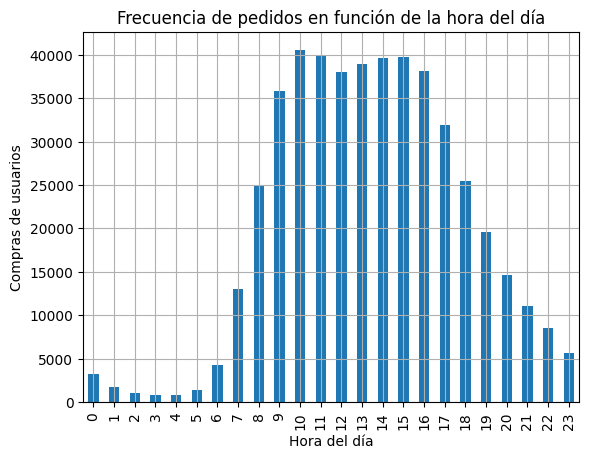

In [42]:
users_count = orders.groupby('order_hour_of_day')['user_id'].count()
users_count.plot(kind='bar', xlabel = 'Hora del día', ylabel = 'Compras de usuarios', grid = True)
plt.title('Frecuencia de pedidos en función de la hora del día')
plt.show()

- El horario en el que vemos más pedidos concretados en la plataforma es en de 8 a 19 horas, por la noche (de 20 a 23 hrs) vemos que tambien se completan varios pedidos, sin embargo, a las primeras horas del día, es poco frecuente que se concreten pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

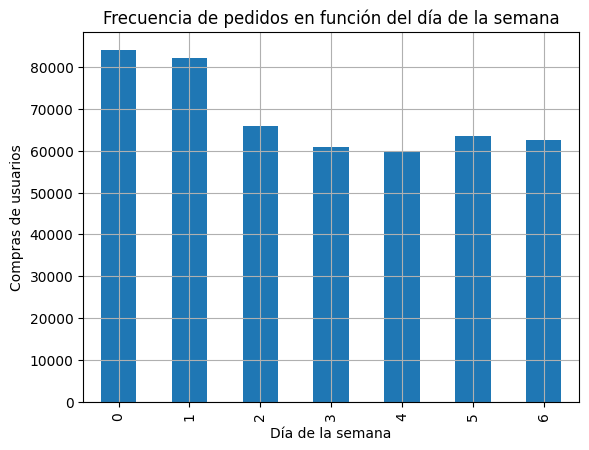

In [44]:
#days = {0:'Domingo', 1:'Lunes', 2:'Martes', 3:'Miércoles', 4:'Jueves', 5:'Viernes', 6:'Sábado'}
dows = orders
#dows['order_dow'] = dows['order_dow'].replace(days)
users_dow = dows.groupby('order_dow')['user_id'].count()
users_dow.plot(kind='bar', xlabel = 'Día de la semana', ylabel = 'Compras de usuarios', grid = True)
plt.title('Frecuencia de pedidos en función del día de la semana')
plt.show()

- Los días mas productivos para la empresa on los domingos (0) y los lunes (1), días donde los usuarios hacen mas compras. Los jueves por el contrario, son los menos productivos.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido?

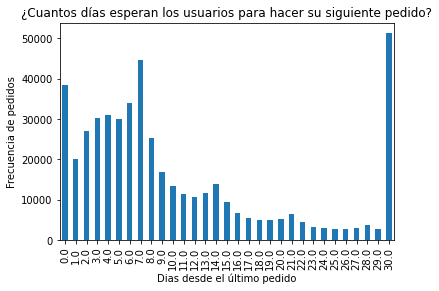

In [38]:
#  Tiempo (en días) que la gente espera hasta hacer su siguiente pedido:

days_spo_count = orders['days_since_prior_order'].value_counts().sort_index()
days_spo_count.plot(kind="bar",
                   xlabel= 'Dias desde el último pedido',
                   ylabel= 'Frecuencia de pedidos',
                   title = '¿Cuantos días esperan los usuarios para hacer su siguiente pedido?')
plt.show()

#print(orders[orders['days_since_prior_order']==0].count())
#days_spo_count.loc[0]

- Gran parte de los usuarios espera entre 30, 7 y 0 dias para hacer su siguiente pedido. De modo que tenemos que los clientes suelen hacer compras diarias, semanales y mensuales en la plataforma

# [B] 

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados?
2. Graficar la distribución para el número de órdenes que hacen los clientes.
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia ?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`.

,Miercoles,Sábado
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118


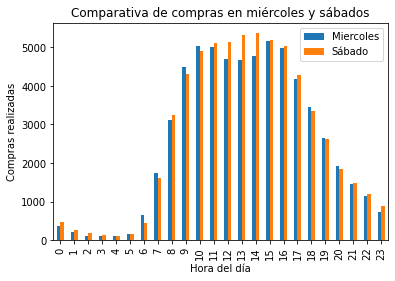

In [39]:
df_sabado= orders[orders['order_dow']== 6]['order_hour_of_day'].value_counts().sort_index()
df_miercoles = orders[orders['order_dow']== 3]['order_hour_of_day'].value_counts().sort_index()
miercoles_sabado = pd.DataFrame({'Miercoles':df_miercoles, 'Sábado':df_sabado})
display(miercoles_sabado.head())

miercoles_sabado.plot(kind = 'bar', xlabel = 'Hora del día', ylabel = 'Compras realizadas',
                      title = 'Comparativa de compras en miércoles y sábados')
plt.show()

- En ambos días, la distribución de compras a lo largo del día es muy similar. Sin embargo, la frecuencia de compra tiende a ser ligeramente mayor los sábados, comparado con los miércoles, en especial en un horario de 12 a 14, donde esta diferencia se acentúa aun más.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

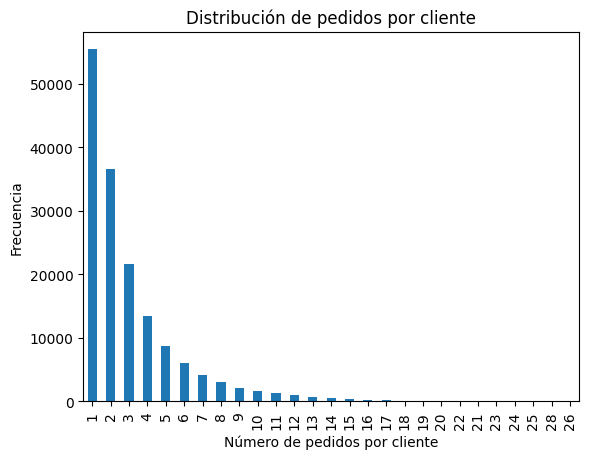

order_id
25    1
28    1
26    1
Name: count, dtype: int64
order_id
1    55357
Name: count, dtype: int64


In [45]:
PPC = orders.groupby('user_id')['order_id'].count() # PPC -> Pedidos por cliente
distribucion_PPC = PPC.value_counts()# Distribución de pedidos por cliente 

distribucion_PPC.plot(kind='bar', xlabel = 'Número de pedidos por cliente', ylabel = 'Frecuencia',
                      title = 'Distribución de pedidos por cliente')
plt.show()
print(distribucion_PPC[distribucion_PPC == min(distribucion_PPC)])
print(distribucion_PPC[distribucion_PPC == max(distribucion_PPC)])

- Vemos que es más frecuente que existan clientes con un solo pedido en la plataforma (55357 clientes). 
- Hay 1 solo cliente que tiene un histórico de 28 compras en la plataforma.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
# Contemos cuántas veces se compró cada producto
recuento_productos_comprados = order_products.groupby('product_id')['order_id'].count()
recuento_productos_comprados.name = 'order_frequency' # Cambiamos el nombre de la columna que hace el recuento
##display(len(recuento_productos_comprados)) 
##display(len(products))
    # Vemos que la longitud del recuento es menor a la lista total de productos, lo que sugiere que no todos los productos
    # de la tienda se han comprado. Considerndo esto, utilizaremos una unión interna de ambos dataframes

productos_comprados = products.merge(recuento_productos_comprados, on='product_id')

# Unimos los productos con su departamento y pasillo:
productos_comprados = productos_comprados.merge(aisles, on='aisle_id')
productos_comprados = productos_comprados.merge(departments, on='department_id')

# Ordenamos la el DF de manera descendente de acuerdo a 'order_frequency' y 
top_productos_comprados = productos_comprados.sort_values('order_frequency', ascending = False).reset_index()

# Mostramos los 20 productos más comprados
print('Los 20 productos mas comprados son:')
display(top_productos_comprados[0:20])






Los 20 productos mas comprados son:


,level_0,index,product_id,product_name,aisle_id,department_id,order_frequency,aisle,department
0,38064,24851,24852,BANANA,24,4,66050,fresh fruits,produce
1,37980,13175,13176,BAG OF ORGANIC BANANAS,24,4,53297,fresh fruits,produce
2,38041,21136,21137,ORGANIC STRAWBERRIES,24,4,37039,fresh fruits,produce
3,37032,21902,21903,ORGANIC BABY SPINACH,123,4,33971,packaged vegetables fruits,produce
4,38229,47208,47209,ORGANIC HASS AVOCADO,24,4,29773,fresh fruits,produce
5,38235,47765,47766,ORGANIC AVOCADO,24,4,24689,fresh fruits,produce
6,38232,47625,47626,LARGE LEMON,24,4,21495,fresh fruits,produce
7,38006,16796,16797,STRAWBERRIES,24,4,20018,fresh fruits,produce
8,38076,26208,26209,LIMES,24,4,19690,fresh fruits,produce
9,21279,27844,27845,ORGANIC WHOLE MILK,84,16,19600,milk,dairy eggs


- Es evidente que de los productos mas comprados en la tienda, la mayoria de estos pertenecen al departamento de produce, a los pasillos de fresh fruits, packaged vegetables fruits, fresh vegetables.
- Solo hay un producto (ORGANIC WHOLE MILK), del pasillo 'milk' que pertenece a un departamento diferente: 'dairy eggs'


# [C] 

1. ¿Cuántos artículos suelen comprar las personas en un pedido?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse (reordenarse) con mayor frecuencia?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos)?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcular la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Procedimiento:
1. Agrupar por order_id (order_products)
2. Contar cuantos product_id (order_products) hay en la agrupación anterior
3. Contar las veces que se repiten los valores en el conteo anterior (value_counts)
4. Graficar la distribución



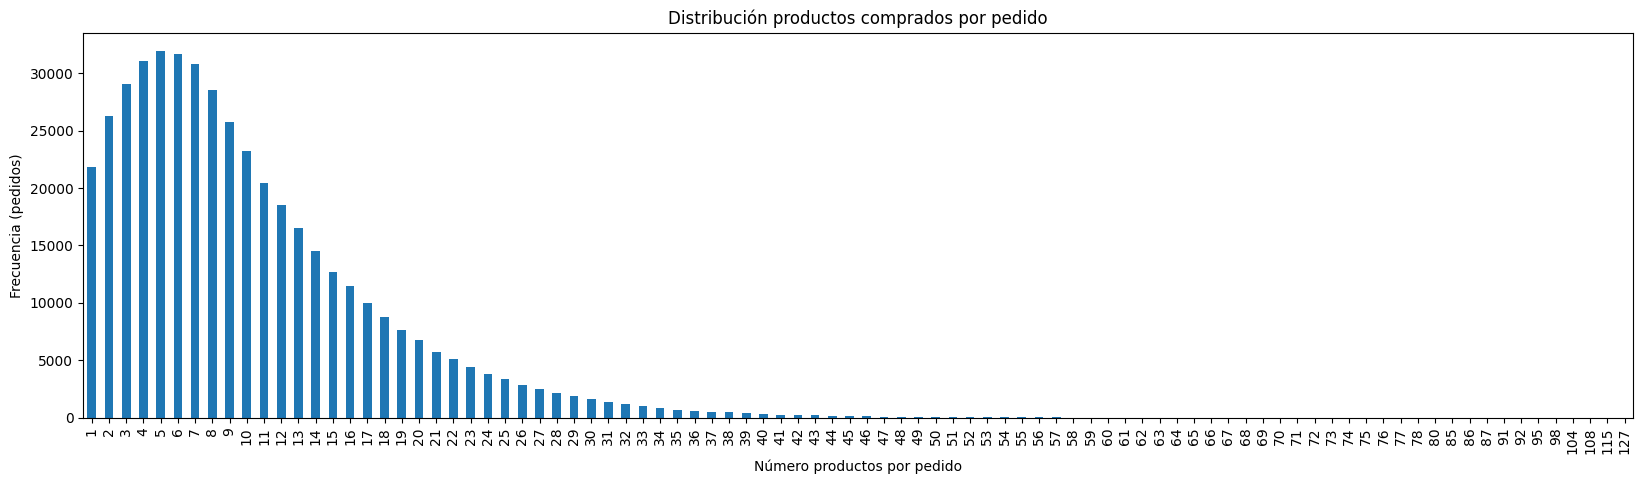

In [47]:
count = order_products.groupby('order_id')['product_id'].count() # PAso 1 y 2

re_count = count.value_counts().sort_index() # Paso 3

#Paso 4
plt.figure(figsize=(20, 5))
re_count.plot(kind='bar', xlabel = 'Número productos por pedido', ylabel = 'Frecuencia (pedidos)',
                      title = 'Distribución productos comprados por pedido')
plt.show()

- La mayoría de las ordenes de la empresa involucran la compra de 5 productos a la vez.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

Para este punto, usaremos la tabla ***top_productos_comprados*** que obtuvimos en el punto [B3]

In [48]:
# Fusionamos a esta tabla la columna reordered del DF order_products. Hacemos un merge izquierdo
# para que se conserven las columnas del df top_productos_comprados
top_veinte = top_productos_comprados[0:20]
top_veinte_reordenados = top_veinte.merge(order_products, on='product_id', how='left')
##display(top_veinte_reordenados)

# Filtramos aquellos productos que fueron reordenados:
productos_reordenados = top_veinte_reordenados[top_veinte_reordenados['reordered']==1]
##display(productos_reordenados)

# A continuación mostramos la lista de los productos que son reordenados:
lista_reordenados = productos_reordenados['product_name'].unique()
##display(lista_reordenados)
##print(lista_reordenados.shape) # Contamos cuántos productos de la lista top 20 son reordenados

# Buscamos el id de los productos de esta lista en el df products. para mostrar la información adicional de los productos.
productos_reordenados = products['product_name'].isin(lista_reordenados)
# Mostramos la lista de los top 20 productos reordenados:
print('---- Los 20 principales artículos que vuelven a pedirse con mayor frecuencia ----')
display(products[productos_reordenados][['product_id','product_name']])

---- Los 20 principales artículos que vuelven a pedirse con mayor frecuencia ----


,product_id,product_name
5741,5876,ORGANIC LEMON
8079,8277,APPLE HONEYCRISP ORGANIC
12832,13176,BAG OF ORGANIC BANANAS
16360,16797,STRAWBERRIES
20593,21137,ORGANIC STRAWBERRIES
21338,21903,ORGANIC BABY SPINACH
22346,22935,ORGANIC YELLOW ONION
24210,24852,BANANA
24321,24964,ORGANIC GARLIC
25528,26209,LIMES


- Se concluye que todos los productos mas comprados se han llegado a pedir de vuelta por los clientes. Ya que la longitud de la lista de reordenados es igual a 20.
    
- Sin embargo, esto no implica que todos los clientes lo vuelvan a ordenar, solo indica que el producto se ha reordenado 


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [49]:
# Usaremos la tabla top_veinte_reordenados que se obtuvo en el paso anterior
# Para saber la proporción tomamos como ejemplo a la BANANA, que se ha ordenado un total de:
total_banana = top_veinte_reordenados[(top_veinte_reordenados['product_name']=='BANANA')]['reordered'].count()
print('De ', total_banana, 'veces que se ordeno el producto:') # 66050 veces
# sin embargo, para todas ellas, la columna reorder nos indica 1 y 0:
veces_uno = top_veinte_reordenados[top_veinte_reordenados['product_name']=='BANANA']['reordered'].sum()
veces_cero = top_veinte_reordenados[(top_veinte_reordenados['product_name']=='BANANA') & (top_veinte_reordenados['reordered']==0)]['reordered'].count()
print('-->', veces_uno, ' veces se reordenó el producto') # 55763
print('-->', veces_cero, ' veces NO se reordeno el producto') # 10287
print('-'*40)
print('Por lo tanto, la proporción de veces que la BANANA se reordenó es: \n', veces_uno/total_banana)

De  66050 veces que se ordeno el producto:
--> 55763  veces se reordenó el producto
--> 10287  veces NO se reordeno el producto
----------------------------------------
Por lo tanto, la proporción de veces que la BANANA se reordenó es: 
 0.8442543527630583


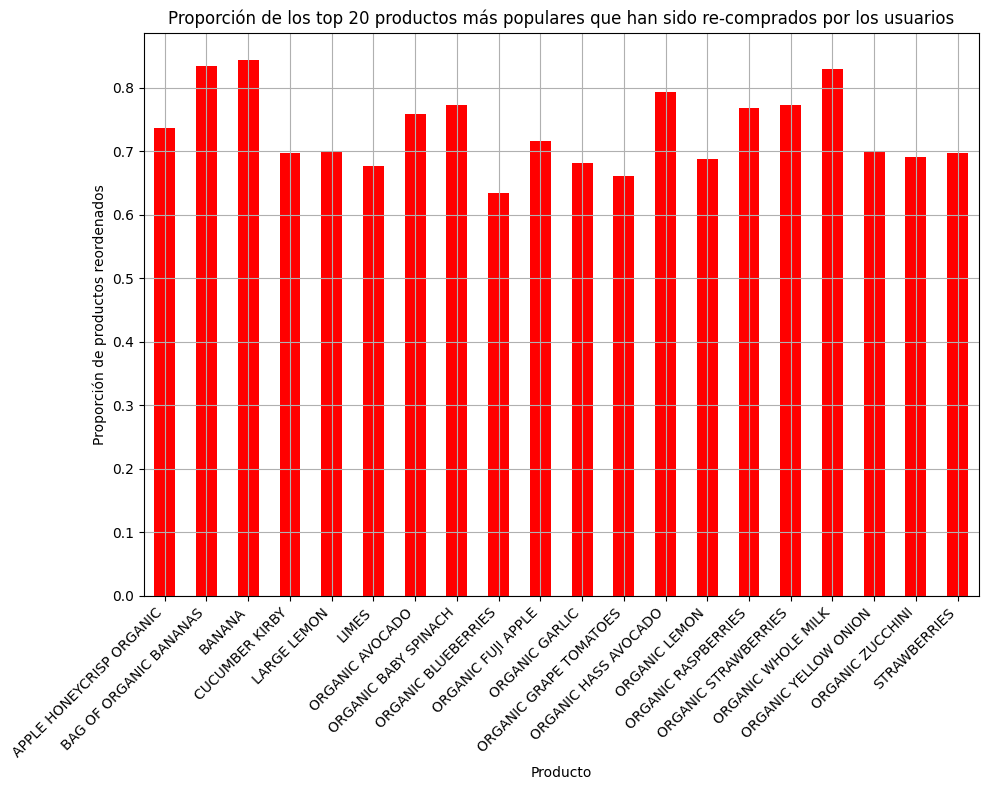

In [50]:
# Aplicamos el razonamiento anterior a todo el DF "top_veinte_reordenados"

# Agrupamos el DF por productos y contamos cuantas veces en total se ordenó el producto:
ordenes_totales = top_veinte_reordenados.groupby('product_name')['reordered'].count()
##display(ordenes_totales)

# Ahora sumamos la columna 'reordered' para saber el número de veces que se reordeno el producto:
total_reordenados = top_veinte_reordenados.groupby('product_name')['reordered'].sum()
#display(total_reordenados)

# Obtenemos la proporción de reordenados: total_reordenados/ordenes_totales
proporcion_reordenados = total_reordenados/ordenes_totales
##display(proporcion_reordenados)

# Graficamos la proporción para cada producto:
plt.figure(figsize=(10, 8))
proporcion_reordenados.plot(kind='bar', rot = 90, grid='on', color='red',
                            xlabel = 'Producto', ylabel = 'Proporción de productos reordenados',
                            title = 'Proporción de los top 20 productos más populares que han sido re-comprados por los usuarios')
etiquetas_X = proporcion_reordenados.index
plt.xticks(range(len(etiquetas_X)), etiquetas_X, rotation=45, ha="right")
# La opción ha="right" alinea las etiquetas hacia la derecha para mejorar la legibilidad.

#plt.ylim(0.6,1)
plt.tight_layout()
plt.show()

- Vemos que en los para los veinte artículos más comprados, la proporción de recompra por los usuarios esta arriba del 50% en todos los casos, siendo la BANANA el producto mas popular más recomprado por los usuarios

### [C4] Para cada cliente, ¿qué proporción de sus productos top vendidos ya los había pedido?

In [51]:
#display(top_veinte_reordenados)
top_veinte_reordenados['order_id'].unique().shape
top_reordenados_users = top_veinte_reordenados.merge(orders, on='order_id', how='left')[['user_id','product_id', 'product_name', 'reordered']]
##display(top_reordenados_users.head())

#calculamos el total de usuarios que han ordenado (ya sea una o mas veces) productos de los 20 mas vendidos
##print(top_reordenados_users.groupby('user_id')['user_id'].unique().shape) # 98745 usuarios 

# Calculamos el total de usuarios que han ordenado productos top vendidos
total_users_que_ordenan = top_reordenados_users.groupby('user_id')['reordered'].count()

# Calculamos el total de usuarios que han re-ordenado poductos top vendidos
total_users_que_reordenan = top_reordenados_users.groupby('user_id')['reordered'].sum()

# Calculamos la proporción:  
proporcion_users_que_reordenan = total_users_que_reordenan/total_users_que_ordenan

# La convertimos en un DF:
proporcion_users_que_reordenan = pd.DataFrame({'Proporcion': proporcion_users_que_reordenan})

# La Cantidad de usuarios del negocio es demasiado grande para verla en una gráfica. sin embargo, hareos un filtro para ver
# que porcentaje de estos usuarios tiene una proporción de recompra mayor al 50%
users_top_20 = len(proporcion_users_que_reordenan)
print('De los',users_top_20 , 'usuarios que ordenan productos del top 20 más vendido, ')
tasa_superior = len(proporcion_users_que_reordenan[(proporcion_users_que_reordenan['Proporcion']>=0.5) & (proporcion_users_que_reordenan['Proporcion']<=1)])
print(tasa_superior, 'de esos usuarios tienen una tasa de recompra superior al 50%. \n')
print('Esto significa que un', tasa_superior*100/users_top_20, '% de usuarios que compran productos top vendidos hacen una recompra')

De los 98745 usuarios que ordenan productos del top 20 más vendido, 
72633 de esos usuarios tienen una tasa de recompra superior al 50%. 

Esto significa que un 73.55612942427464 % de usuarios que compran productos top vendidos hacen una recompra


- A diferencia del caso anterior, tenemos demasiados usuarios en la plataforma para poder visualizar los datos correctamente, pero analizando un análisis matemático de las proporciones, llegamos a la siguiente conclusión:
    - De los 98745 usuarios que ordenan productos del top 20 más vendido, 72633 de esos usuarios tienen una tasa de recompra superior al 50%. Esto significa que un 73.55612942427464 % de usuarios que compran productos top vendidos hacen una recompra

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [52]:
# Obtenemos los productos que la gente pone primero en sus carritos:
first_cart = order_products[order_products['add_to_cart_order']==1]
first_cart_products = pd.merge(first_cart, products, on='product_id', how='left')

agg_dict = {'add_to_cart_order': 'count'}
first_cart_products_group = first_cart_products.groupby(['product_id','product_name']).agg(agg_dict)
first_cart_products_ordered = first_cart_products_group.sort_values('add_to_cart_order', ascending = False).reset_index()
first_cart_products_ordered = first_cart_products_ordered.rename(columns={'add_to_cart_order': 'recuento'})
print('Los 20 principales artículos que las personas ponen primero en sus carritos')
display(first_cart_products_ordered.loc[0:19])

# Comparamos con la tabla de productos más vendidos:
#print('\nLos 20 productos mas comprados son:')
#display(top_productos_comprados.loc[0:19])

Los 20 principales artículos que las personas ponen primero en sus carritos


,product_id,product_name,recuento
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


- Vemos que los productos que la gente añade primero a sus carritos son alimentos y el primero de ellos coincide con el producto más comprado, las bananas.
___

# Conclusion general del proyecto:

En este proyecto, se analizaron los datos de un comercio. Para ello, se leyeron y preprocesaron los datos brutos, para corregir cualquier error en ellos que pudiera afectar el análisis, por ejemplo, duplicados, valores ausentes, o errores en la lectura de los datos brutos.

Posteriormente, al analizar los datos preprocesados, se llegó a conclusiones importantes para el desempeño del negocio, tales como:
- **Los horarios más productivos del negocio**: horas y días de la semana con más ventas
- **Habitos de los usuarios**: Cuantos pedidos hacen, cuantos productos compran por pedido y cada cuanto tiempo suelen comprar, así como cuales son los productos que suelen comprar habitualmente
- **Información sobre los pedidos**: Cuantos pedidos hay por cliente, cuantos productos lleva cada pedido
- **Información sobre los productos**: Cuales son los productos más vendidos, los productos que se re-compran con mayor frecuencia y los productos que se ponen primero en el carrito.

Con esta información se podrán generar estrategias que mejoren el rendimiento en ventas de los productos más populares y que a su vez se adapten a los habitos de compra de los usuarios.  